In [52]:
# Working directory set
import sys
sys.path.append("../scripts/")

In [53]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from clean_data import load_and_clean_data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import shap
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 400)

In [55]:
X_train, X_test, y_train, y_test = load_and_clean_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state = 42)

Columns (10,17,19,23,25,27,28,29,30,32,33,36,37,38,39,40,41,42,43,50,51,83,86,89,92,94,95,97,100,103,106,110,113,116,121,124,127,130,133,136,188,190,201,212,231,232,242,244,247,249,256,262,267,273,279,280,281,282,283,284,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,305,318,320,333,334) have mixed types.Specify dtype option on import or set low_memory=False.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [93]:
final_features = pd.read_csv('feature_selection_final_columns.csv')
final_features.rename(columns = {'0': 'feat'}, inplace = True)  

In [94]:
final_features

,feat
0,COL_ANASTOMOTIC_7
1,WNDCLAS_2
2,C20
3,PRNCPTX_7
4,WTLOSS
5,WORKRVU
6,COL_ANASTOMOTIC_6
7,PRSODM
8,SMOKE
9,FNSTATUS2_2


In [95]:
features = final_features['feat']

In [96]:
#will actually reaplace the full final features here but for now just take 3
X_train_sub = X_train[features]

In [97]:
X_train_sub

,COL_ANASTOMOTIC_7,WNDCLAS_2,C20,PRNCPTX_7,WTLOSS,WORKRVU,COL_ANASTOMOTIC_6,PRSODM,SMOKE,FNSTATUS2_2,...,SEPSHOCKPATOS,PRWBC,SSSIPATOS,COL_ANASTOMOTIC_3,COL_ANASTOMOTIC_4,PRHCT,COL_MALIGNANCYT_3,WNDCLAS_3,OPRENAFL,HXCHF
37718,0.0,0.0,0,0.0,0.0,28.58,0.0,135.0,0.0,0.0,...,0.0,7.80,0.0,0.0,0.0,37.7,1.0,0.0,0.0,0.0
109955,0.0,0.0,0,0.0,1.0,30.09,0.0,137.0,0.0,0.0,...,0.0,6.40,0.0,0.0,0.0,28.4,0.0,1.0,0.0,0.0
194551,0.0,0.0,0,0.0,0.0,29.79,0.0,142.0,0.0,0.0,...,0.0,7.70,0.0,0.0,0.0,20.3,0.0,0.0,0.0,0.0
90915,0.0,0.0,0,0.0,0.0,20.89,0.0,138.0,0.0,0.0,...,0.0,9.24,0.0,0.0,0.0,43.1,0.0,0.0,0.0,0.0
97477,0.0,0.0,0,0.0,0.0,26.42,0.0,132.0,0.0,0.0,...,0.0,13.70,0.0,0.0,0.0,26.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,0.0,0.0,0,0.0,0.0,27.79,0.0,139.0,0.0,0.0,...,0.0,10.80,0.0,0.0,1.0,35.3,0.0,1.0,0.0,0.0
91253,0.0,0.0,0,1.0,0.0,29.91,0.0,134.0,0.0,0.0,...,1.0,17.63,0.0,0.0,0.0,38.4,0.0,1.0,0.0,0.0
250753,0.0,0.0,0,0.0,0.0,26.42,0.0,140.0,0.0,0.0,...,0.0,9.00,0.0,0.0,0.0,39.1,0.0,0.0,0.0,0.0
154686,0.0,0.0,0,0.0,0.0,33.99,0.0,137.0,0.0,0.0,...,0.0,6.70,0.0,0.0,0.0,40.2,0.0,0.0,0.0,0.0


In [98]:
# train  model (this will be the final model but for now just untuned DT)
model = XGBClassifier(eta = 0.2, eval_metric = 'auc', max_depth = 6).fit(X_train_sub, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [99]:
imp = pd.DataFrame(model.feature_importances_, columns = ['imp'])
imp.index = X_train_sub.columns

In [100]:
imp.sort_values('imp', ascending = False, inplace = True)

In [101]:
#Importance is calculated for a single decision tree by the amount that each
#attribute split point improves the performance measure, weighted by the number of
#observations the node is responsible for.
#The performance measure may be the purity (Gini index) used to select 
#the split points or another more specific error function. The feature importances 
#are then averaged across all of the the decision trees within the model.
imp

,imp
OTHBLEED,0.192508
RETURNOR,0.046800
OTHSYSEP,0.045771
SUPINFEC,0.042087
URNINFEC,0.038183
ORGSPCSSI,0.035957
COL_ANASTOMOTIC_1,0.035914
COL_ILEUS_1,0.034398
DOPTODIS,0.027620
COL_ANASTOMOTIC_2,0.026852


In [102]:
# compute SHAP values
explainer = shap.TreeExplainer(model, X_train_sub)

In [103]:
shap_values = explainer(X_train_sub)

100%|===================| 150183/150286 [03:29<00:00]        

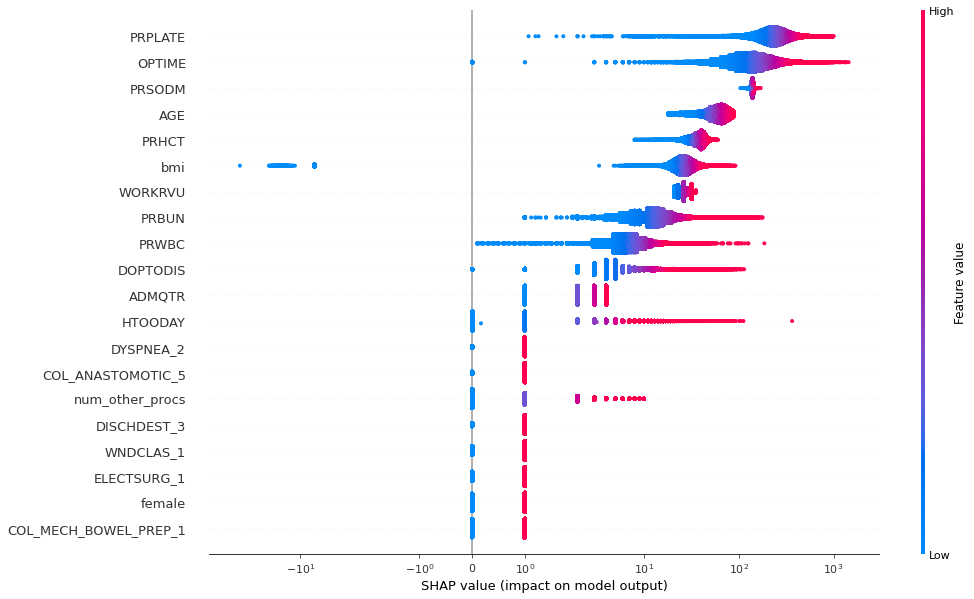

In [104]:
#beeswarm summary
shap.summary_plot(shap_values.data, X_train_sub, use_log_scale=True, plot_size = (15,10), max_display = 20)

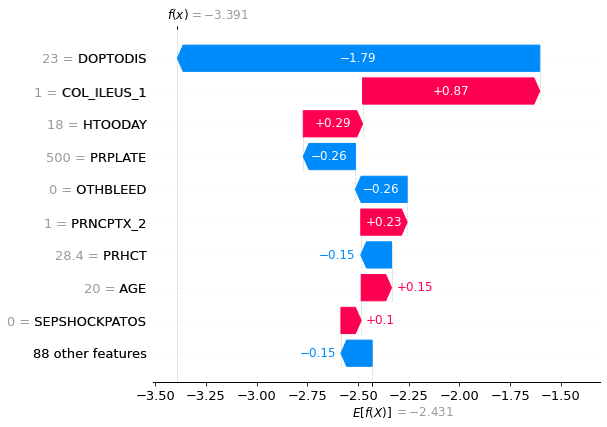

In [105]:
#Waterfall plots are designed to display explanations for individual predictions
#input is one patient
#The bottom of a waterfall plot starts as the expected value of the model output, 
#and then each row shows how the positive (red) or negative (blue) contribution 
#of each feature moves the value from the expected model output over the dataset 
#to the model output for this prediction.
shap.waterfall_plot(shap_values[1])

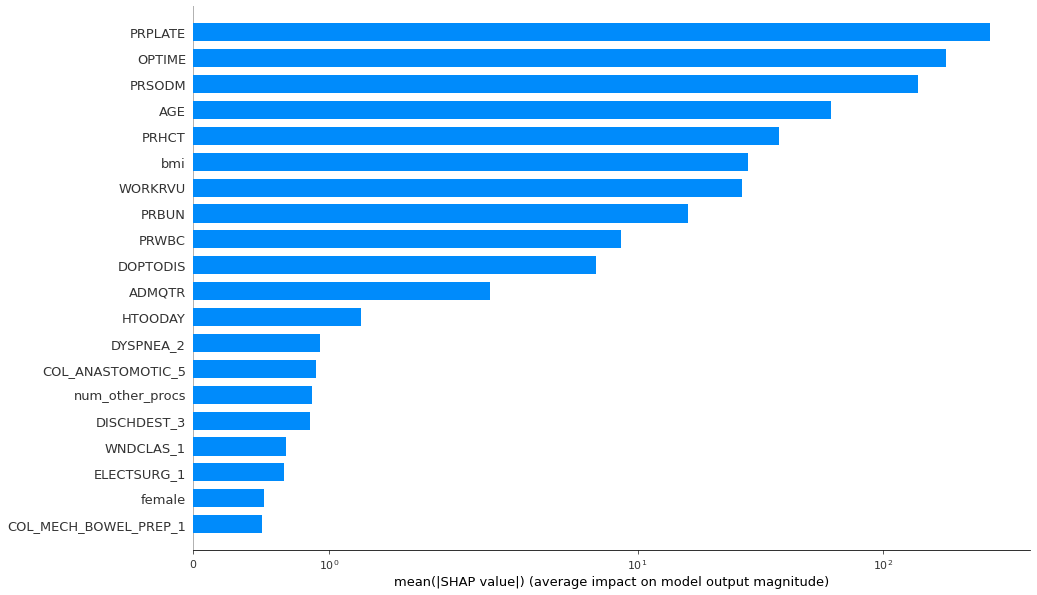

In [106]:
shap.summary_plot(shap_values.data, X_train_sub, use_log_scale=True, plot_size = (15,10), max_display = 20, plot_type = "bar")

In [107]:
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt
def plot_pdp(model, X, feature, target=False, return_pd=False, y_pct=True, figsize=(10,9), norm_hist=True, dec=.5):
    # Get partial dependence
    pardep = partial_dependence(model, X, [feature])
    
    # Get min & max values
    xmin = pardep[1][0].min()
    xmax = pardep[1][0].max()
    ymin = pardep[0][0].min()
    ymax = pardep[0][0].max()
    
    # Create figure
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.grid(alpha=.5, linewidth=1)
    
    # Plot partial dependence
    color = 'tab:blue'
    ax1.plot(pardep[1][0], pardep[0][0], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlabel(feature, fontsize=14)
    
    tar_ylabel = ': {}'.format(target) if target else ''
    ax1.set_ylabel('Partial Dependence{}'.format(tar_ylabel), color=color, fontsize=14)
    
    tar_title = target if target else 'Target Variable'
    ax1.set_title('Relationship Between {} and {}'.format(feature, tar_title), fontsize=16)
    
    if y_pct and ymin>=0 and ymax<=1:
        # Display yticks on ax1 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax1.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax1.set_yticklabels(labels)
    
    # Plot line for decision boundary
    #ax1.hlines(dec, xmin=xmin, xmax=xmax, color='black', linewidth=2, linestyle='--', label='Decision Boundary')
    #ax1.legend()

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.hist(X[feature], bins=80, range=(xmin, xmax), alpha=.25, color=color, density=norm_hist)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylabel('Distribution', color=color, fontsize=14)
    
    if y_pct and norm_hist:
        # Display yticks on ax2 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax2.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax2.set_yticklabels(labels)

    plt.show()
    
    if return_pd:
        return pardep

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


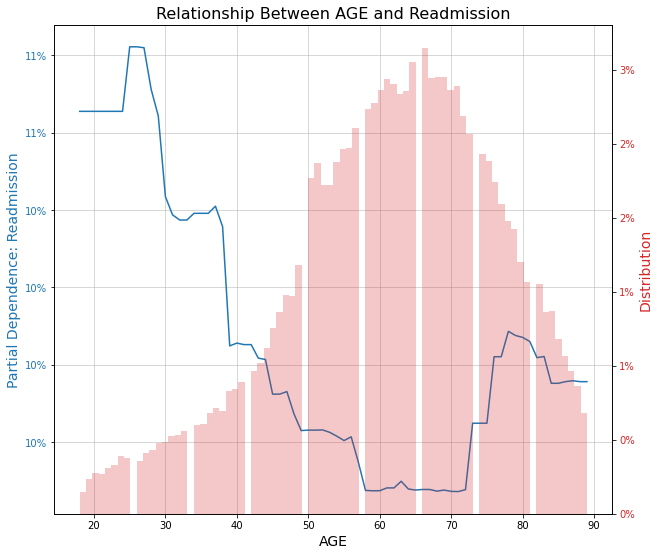

In [108]:
plot_pdp(model, X_train_sub, 'AGE', target='Readmission')

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


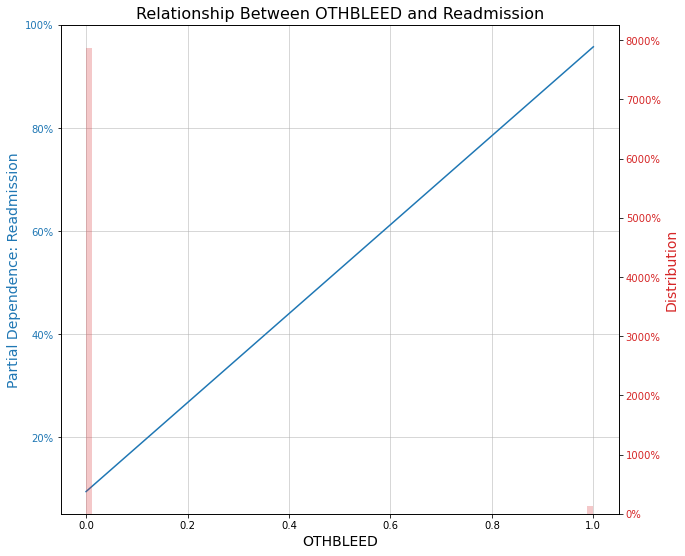

In [109]:
plot_pdp(model, X_train_sub, 'OTHBLEED', target='Readmission')

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


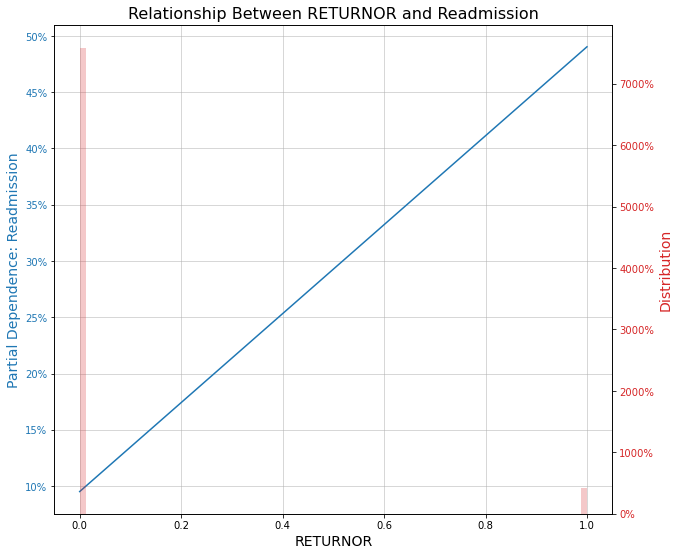

In [111]:
plot_pdp(model, X_train_sub, 'RETURNOR', target = 'Readmission')

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


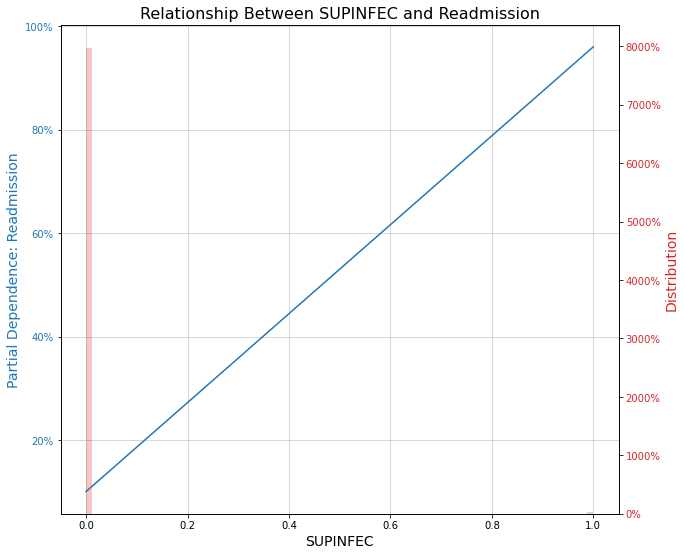

In [112]:
plot_pdp(model, X_train_sub, 'SUPINFEC', target= 'Readmission')